Student Details

Name: Fergus Mc Hale

ID: 18203485

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

In [167]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise= np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

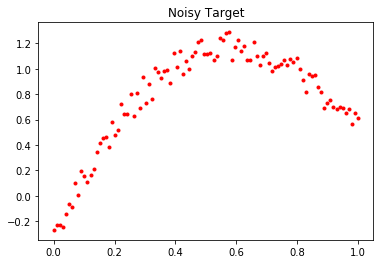

In [168]:
plt.title('Noisy Target')
plt.plot(X,y,'r.')
plt.show()

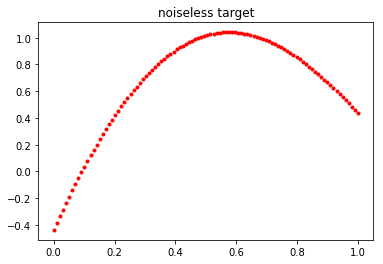

In [169]:
plt.title('noiseless target')
plt.plot(X,y_nf,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [170]:
# Wreg = (Z^TZ+lambaI)-1 Z^Ty
# With Regularisation
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [171]:
# Wlin - (Z^TZ)-1 Z^Ty
# Without Regularisation
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [172]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [173]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [174]:
ein=[]
eout=[]
weights=[]
lambdas = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.07,0.07] #Lamba is infinite
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


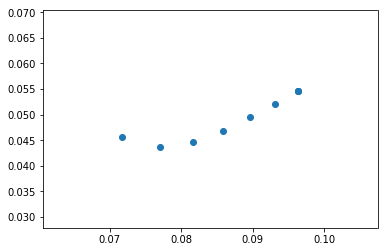

In [175]:
plt.scatter(ein, eout)

# Task 4.1 

Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [161]:
Ein_found = np.asarray(ein)
Eout_found = np.asarray(eout)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(Ein_found,Eout_found, test_size=0.3)

# Linear Regression

In [131]:
linreg = LinearRegression(normalize=True)

In [132]:
model = linreg.fit(X_train.reshape(-1,1), y_train)

In [133]:
predictions = linreg.predict(X_test.reshape(-1,1))

Text(0, 0.5, 'Predictions')

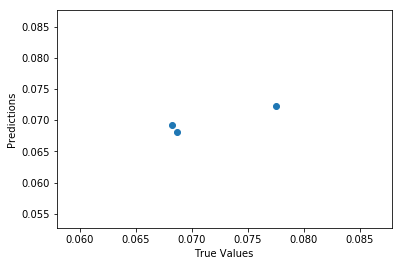

In [134]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [135]:
linreg_score = model.score(X_test.reshape(-1,1), y_test)
print(linreg_score)

0.4642149792641411


In [136]:
k_fold = KFold(n_splits=2)

In [137]:
k_fold.get_n_splits(X)

2

In [138]:
print(k_fold) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [139]:
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)

In [140]:
for train_index, test_index in k_fold.split(X):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


# Lasso

In [141]:
lasso = Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X_train.reshape(-1,1),y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
train_score = lasso.score(X_train.reshape(-1,1),y_train)

In [143]:
test_score = lasso.score(X_test.reshape(-1,1),y_test)

In [144]:
coeff_used = np.sum(lasso.coef_!=0)

In [145]:
print(train_score) 
print(test_score)
print(coeff_used)

0.0
-3.9853552983691953
0


# Ridge

In [146]:
ridge = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
ridge.fit(X_train.reshape(-1,1),y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [148]:
train_score = ridge.score(X_train.reshape(-1,1),y_train)

In [149]:
print(train_score)

0.7091593923327515


In [150]:
test_score = ridge.score(X_test.reshape(-1,1),y_test)

In [151]:
print(test_score)

-6.676127912097434
